<a href="https://colab.research.google.com/github/AgilKaruniati345/UAS_KECERDASAN_BUATAN/blob/main/AGILKARUNIATI_STI202303309_UAS_KECERDASAN_BUATAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Menghitung klasifikasi data set lagu spotify yang paling banyak diputar tahun 2023 menggunakan SVM Classifier dan Decision Tree Classifier

In [ ]:
#import library yg digunakan
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

DATASET
Memasukan data set yang akan dipakai, disini menggunakan dataset lagu spotify yang diambil dari kaggle

In [ ]:
df= pd.read_excel('/content/spotify-2023.xlsx')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


DATA PREPROCESSING
sebelum melakukan klasifikasi data, data perlu diproses terlebih dahulu, maka dilakukan data preprocessing untuk memastikan apakah ada data yang kosong

In [ ]:
shape = df.shape
print("Rows :",shape[0])
print("Coumns :", shape[1])

Rows : 953
Coumns : 24


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

diatas dapat kita ketahui data terdiri dari 953 row, 24 column. Data di atas memiliki total 24 kategori, yang terdiri dari 1 kategori bertipe float (angka desimal), 18 kategori bertipe integer (angka bulat), dan 5 kategori bertipe object (teks atau string).

In [ ]:
df['streams']=pd.to_numeric(df['streams'],errors='coerce')

In [ ]:
df.isna().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,1
in_apple_playlists,0


disini terlihat pada featur streams memiliki 1 data kosong, in_shazam_charts memiliki 50 data kosong, dan key memiliki 95 data kosong.

In [ ]:
df.drop(['key'], axis=1, inplace=True)
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,826.0,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,382.0,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,949.0,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,548.0,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,425.0,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,0.0,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,0.0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,0.0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,0.0,97,Major,82,67,77,8,0,12,5


In [ ]:
df[df.isnull().any(axis=1)]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2.513188e+09,403,...,NaN,174,Minor,52,66,73,34,0,31,6
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1.813674e+09,250,...,NaN,123,Minor,45,13,54,70,0,9,4
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,NaN,171,Major,50,38,80,0,0,9,7
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2.557976e+09,386,...,NaN,81,Major,76,53,53,44,0,9,9
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2.282771e+09,166,...,NaN,124,Major,61,41,81,5,2,10,3
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,NaN,110,Major,50,45,41,75,0,11,3
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2.322580e+09,437,...,NaN,95,Major,55,56,82,12,0,34,5
158,Ghost,Justin Bieber,1,2021,3,19,5866,24,1.167331e+09,107,...,NaN,154,Major,61,41,74,21,0,40,6
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,9.299648e+08,133,...,NaN,117,Minor,73,31,69,6,0,11,4
180,Night Changes,One Direction,1,2014,11,17,7124,18,1.131091e+09,60,...,NaN,120,Major,67,40,52,86,0,12,4


Visulization
setelah data diproses maka data akan dilihat sehingga dapat dideskripsikan korelasi dari masing masing atribut

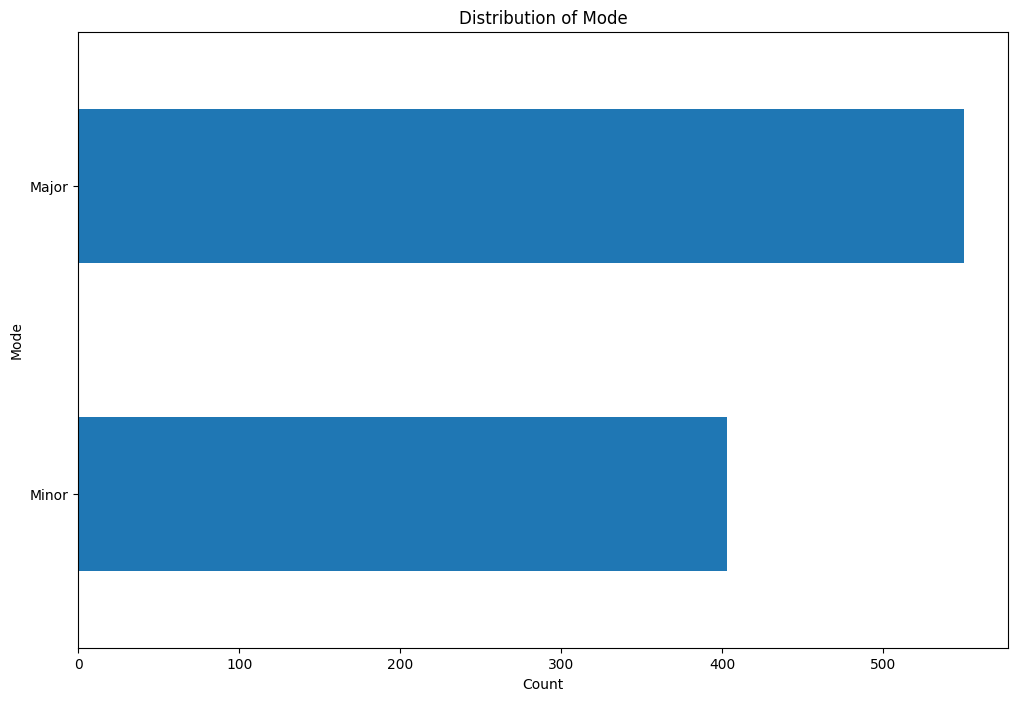

In [ ]:

v = df['mode'].value_counts()
v = v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12, 8))
v.plot(kind='barh')
plt.title('Distribution of Mode')
plt.xlabel('Count')
plt.ylabel('Mode')
plt.show()



visualisasi lagu paling laris

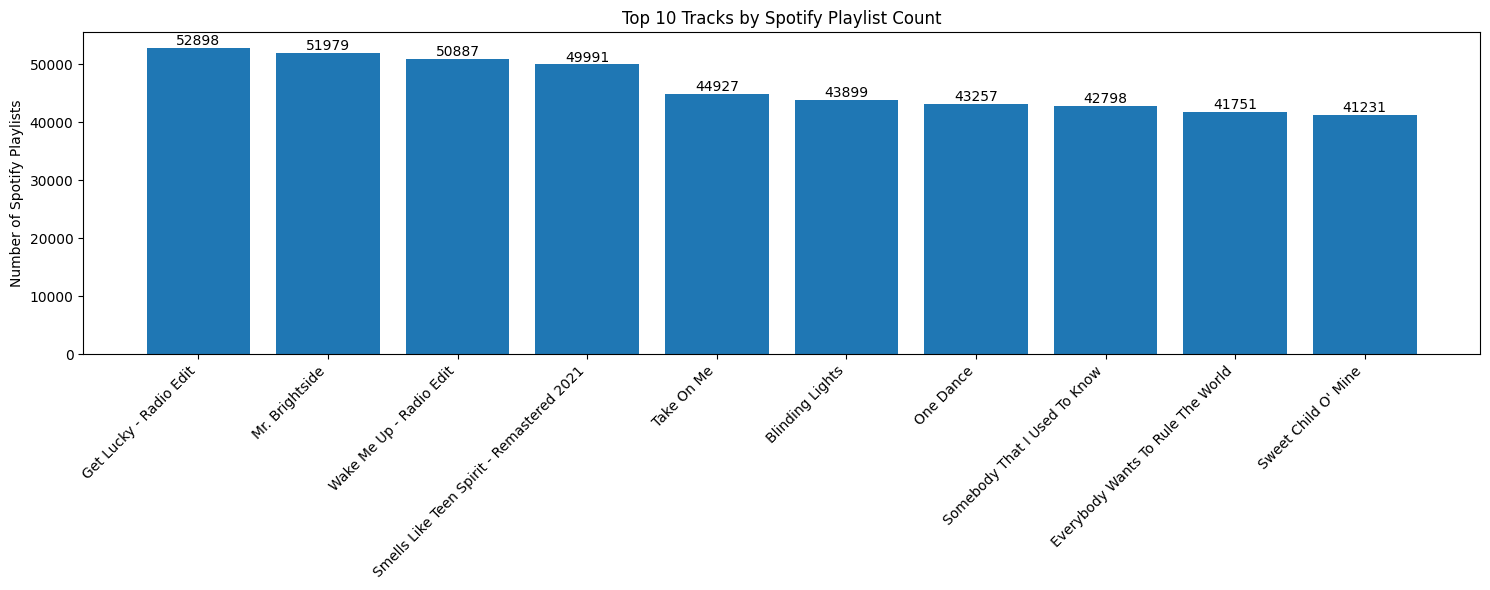

In [ ]:

top_10_tracks = df.nlargest(10, 'in_spotify_playlists')

track_names = top_10_tracks['track_name']
playlist_counts = top_10_tracks['in_spotify_playlists']

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(track_names, playlist_counts)
ax.set_ylabel('Number of Spotify Playlists')
ax.set_title('Top 10 Tracks by Spotify Playlist Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
for p in ax.patches:
  an=ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
  an.set_size(10)
plt.show()



Jenis kunci musik yang paling diminati

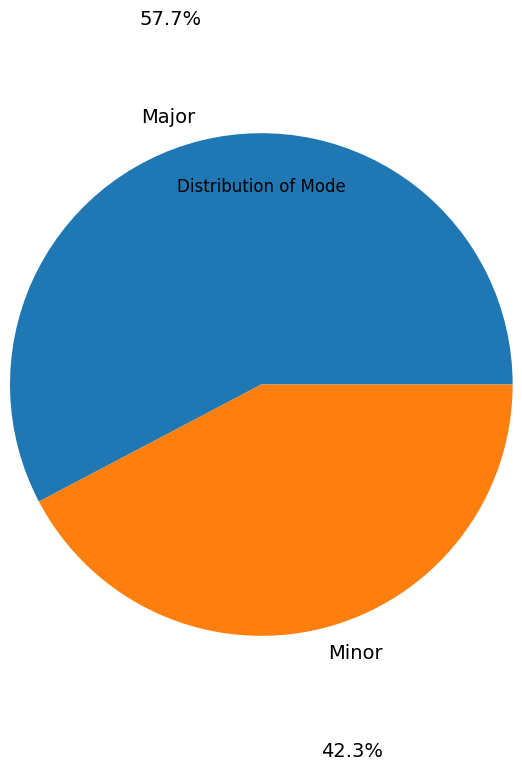

In [ ]:
style=df['mode'].value_counts() # Assuming 'mode' is the intended column
plt.pie(style[0:5],pctdistance=1.5,autopct="%2.01f%%",radius=1.7, labels=style.index, # Use correct labels from value_counts index
explode=[0,0][:len(style)], # Adjust explode based on the number of wedges
textprops={'fontsize':14})
plt.title('Distribution of Mode') # Add a title for clarity
plt.show()

Classification
setelah dilakukan visualisasi pada data maka akan dilakukan proses klasifikasi

In [ ]:

feature_cols = ['artist_count', 'released_year', 'released_month', 'released_day',
                'in_spotify_playlists', 'in_spotify_charts', 'streams',
                'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%',
                'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                'liveness_%', 'speechiness_%']


feature_cols = ['artist_count', 'released_year', 'released_month', 'released_day',
                'in_spotify_playlists', 'in_spotify_charts',
                'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
                'in_deezer_charts', 'bpm', 'danceability_%',
                'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
                'liveness_%', 'speechiness_%']


x = df[feature_cols]
y = df['mode'] # Set 'mode' as the target variable

print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)

# Check for missing values in the selected features and target
print("\nMissing values in features (x):")
print(x.isna().sum())
print("\nMissing values in target (y):")
print(y.isna().sum())

Features (x) shape: (953, 18)
Target (y) shape: (953,)

Missing values in features (x):
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
bpm                     0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Missing values in target (y):
0


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=1, test_size=0.3)

Metode SVM Classification

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(svm.score(x_test,y_test)*100,2)))

Test Accuracy: 58.04%


Metode Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(dt.score(x_test,y_test)*100,2)))

Test Accuracy: 55.24%


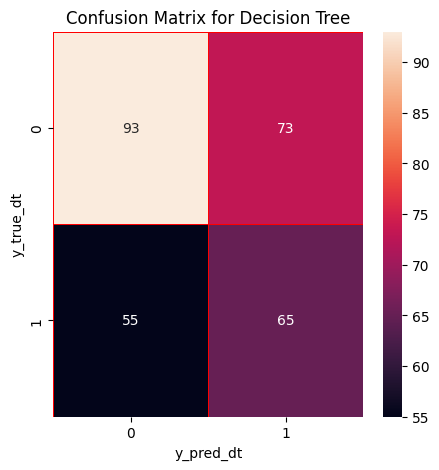


Classification Report for Decision Tree:
              precision    recall  f1-score   support

       Major       0.63      0.56      0.59       166
       Minor       0.47      0.54      0.50       120

    accuracy                           0.55       286
   macro avg       0.55      0.55      0.55       286
weighted avg       0.56      0.55      0.56       286



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Assuming you want to evaluate the Decision Tree model (dt)
y_pred_dt = dt.predict(x_test)
y_true_dt = y_test

# Generate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_true_dt, y_pred_dt)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm_dt, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.title("Confusion Matrix for Decision Tree") # Add a title
plt.show()

# Generate and print classification report for Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_true_dt, y_pred_dt))


KESIMPULAN
1. Tujuan klasifikasi
Memprediksi preferensi pendengar terhadap lagu-lagu populer di Spotify tahun 2023 berdasarkan fitur-fitur audio dan metadata lagu.

2. Dataset yang digunakan 10 lagu terbaik yang paling sering didengarkan di Spotify sepanjang tahun 2023.

3. Lagu “Get Lucky - Radio Edit” menjadi lagu paling populer denganScore tertinggi: 52.898

Kunci musik: Major (57,7%) vs Minor (42,3%)

4. Metode Klasifikasi yang DigunakanSupport Vector Machine (SVM) dan Decision Tree Classifier

5. Hasil Evaluasi Akurasi

🎯 SVM Classifier menghasilkan akurasi sebesar 58,04%
🌳 Decision Tree Classifier menghasilkan akurasi sebesar 55,24%

6. Kesimpulan Model SVM menunjukkan performa sedikit lebih baik dibandingkan Decision Tree.

